In [4]:
import pandas as pd

In [5]:
cyc = pd.read_csv("202502-divvy-tripdata.csv")

In [6]:
cyc.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A246CA24873F7C5C,classic_bike,2025-02-25 21:21:21.171,2025-02-25 21:30:09.941,Michigan Ave & Lake St,TA1305000011,Clark St & Elm St,TA1307000039,41.886022,-87.624398,41.902973,-87.631280,member
1,303C0906F3F068AE,classic_bike,2025-02-08 14:55:13.493,2025-02-08 15:13:39.890,Ogden Ave & Race Ave,13194,Clark St & Elm St,TA1307000039,41.891795,-87.658751,41.902973,-87.631280,member
2,A0F65F3531F1FB2B,electric_bike,2025-02-24 00:32:56.553,2025-02-24 00:38:21.711,Michigan Ave & Lake St,TA1305000011,Wabash Ave & 9th St,TA1309000010,41.886022,-87.624398,41.870769,-87.625734,casual
3,CE663C815B6A6D73,electric_bike,2025-02-07 17:00:38.646,2025-02-07 17:34:29.012,Ogden Ave & Race Ave,13194,Clark St & Elm St,TA1307000039,41.891795,-87.658751,41.902973,-87.631280,casual
4,43F626BEF919D026,classic_bike,2025-02-10 14:56:56.565,2025-02-10 15:01:18.745,Clark St & North Ave,13128,Clark St & Elm St,TA1307000039,41.911974,-87.631942,41.902973,-87.631280,member


In [12]:
from IPython.display import display


In [13]:
cyc["started_at"] = pd.to_datetime(cyc["started_at"])
cyc["ended_at"] = pd.to_datetime(cyc["ended_at"])

In [16]:
cyc["ride_duration"] = (cyc["ended_at"] - cyc["started_at"]).dt.total_seconds() / 60  # Convert to minutes

In [17]:
individual_rides = cyc[["member_casual", "ride_duration"]]

In [18]:
display(individual_rides)

,member_casual,ride_duration
0,member,8.812833
1,member,18.439950
2,casual,5.419300
3,casual,33.839433
4,member,4.369667
...,...,...
151875,member,10.147217
151876,member,32.979617
151877,member,3.630283
151878,casual,2.242367


In [19]:
individual_rides.to_csv("individual_ride_durations.csv", index=False)

In [40]:
import matplotlib.pyplot as plt

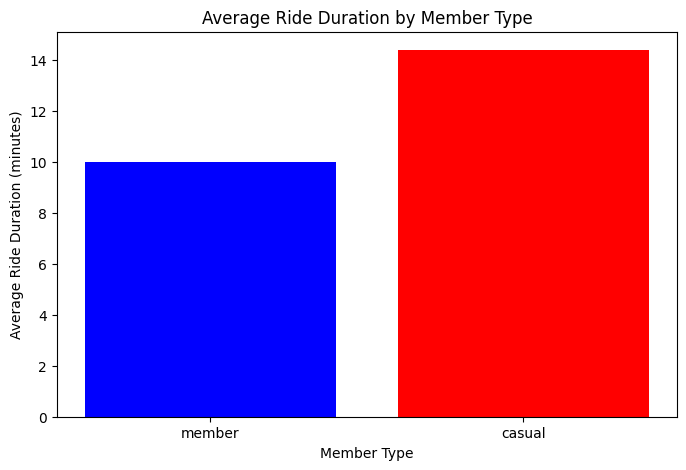

In [43]:
avg_ride_duration = avg_ride_duration.reindex(["member", "casual"])  

plt.figure(figsize=(8,5))
plt.bar(avg_ride_duration.index, avg_ride_duration.values, color=["blue", "red"])  # Blue for members, Red for casuals

# Labels and title
plt.xlabel("Member Type")
plt.ylabel("Average Ride Duration (minutes)")
plt.title("Average Ride Duration by Member Type")

# Show the plot
plt.show()


In [22]:
average_ride_length = individual_rides["ride_duration"].mean()
print("Overall Average Ride Duration (minutes):", average_ride_length)

Overall Average Ride Duration (minutes): 10.798519667610394


In [24]:
total_rides = individual_rides.shape[0]  # Counts the total rows
print("Total Number of Rides:", total_rides)

Total Number of Rides: 151880


In [26]:
cyc["hour"] = cyc["started_at"].dt.hour  # Extract hour from 'started_at'
busiest_hour = cyc["hour"].value_counts().idxmax()
print("Busiest Hour of the Day:", busiest_hour)

Busiest Hour of the Day: 17


In [27]:
cyc["day_of_week"] = cyc["started_at"].dt.day_name()  # Extract day of the week
busiest_day = cyc["day_of_week"].value_counts().idxmax()
print("Busiest Day:", busiest_day)

Busiest Day: Tuesday


In [29]:
cyc["month"] = cyc["started_at"].dt.month_name()  # Extract month name
busiest_month = cyc["month"].value_counts().idxmax()
print("Busiest Month:", busiest_month)

Busiest Month: February


In [31]:
most_popular_bike = cyc["rideable_type"].value_counts().idxmax()
print("Most Popular Bike Type:", most_popular_bike)

Most Popular Bike Type: electric_bike


In [33]:
most_rider_type = cyc["member_casual"].value_counts().idxmax()
print("Most Riders are:", most_rider_type)

Most Riders are: member


In [46]:
total_rides_by_type = cyc["member_casual"].value_counts().reset_index()

total_rides_by_type.columns = ["Member Type", "Total Rides"]

total_rides_by_type["Percentage"] = (total_rides_by_type["Total Rides"] / total_rides_by_type["Total Rides"].sum()) * 100

# Display the table
print(total_rides_by_type)

  Member Type  Total Rides  Percentage
0      member       124126   81.726363
1      casual        27754   18.273637


In [35]:
total_rides_by_type.to_csv("total_rides_percentage.csv", index=False)

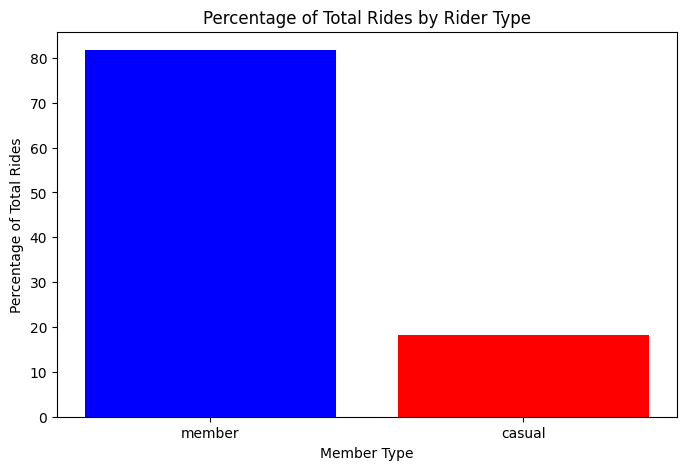

In [44]:
plt.figure(figsize=(8,5))
plt.bar(total_rides_by_type["Member Type"], total_rides_by_type["Percentage"], color=["blue", "red"])

# Labels and title
plt.xlabel("Member Type")
plt.ylabel("Percentage of Total Rides")
plt.title("Percentage of Total Rides by Rider Type")

# Show the plot
plt.show()


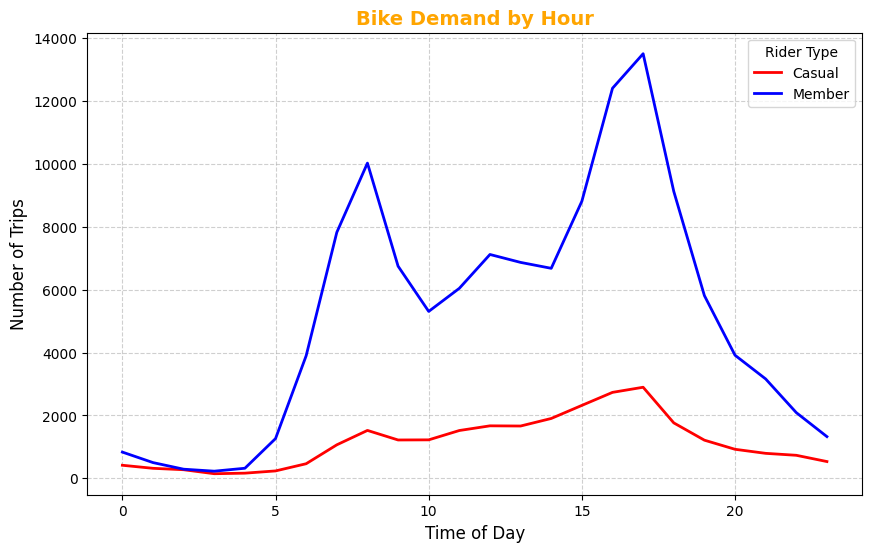

In [45]:
cyc["hour"] = cyc["started_at"].dt.hour

demand_by_hour = cyc.groupby(["hour", "member_casual"]).size().unstack()

plt.figure(figsize=(10,6))

plt.plot(demand_by_hour.index, demand_by_hour["casual"], color="red", label="Casual", linewidth=2)
plt.plot(demand_by_hour.index, demand_by_hour["member"], color="blue", label="Member", linewidth=2)

plt.xlabel("Time of Day", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.title("Bike Demand by Hour", fontsize=14, fontweight="bold", color="orange")

# Show grid and legend
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Rider Type", loc="best")

plt.show()

In [49]:
import numpy as np

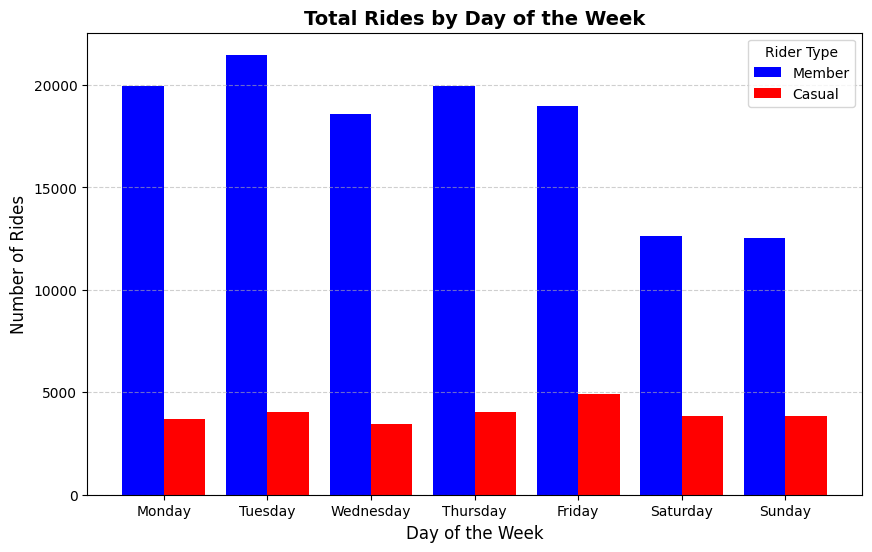

In [50]:
cyc["day_of_week"] = cyc["started_at"].dt.day_name()
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
rides_by_day = cyc.groupby(["day_of_week", "member_casual"]).size().unstack()
rides_by_day = rides_by_day.reindex(day_order)

x = np.arange(len(day_order))
bar_width = 0.4

plt.figure(figsize=(10,6))
plt.bar(x - bar_width/2, rides_by_day["member"], width=bar_width, color="blue", label="Member")
plt.bar(x + bar_width/2, rides_by_day["casual"], width=bar_width, color="red", label="Casual")

plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.title("Total Rides by Day of the Week", fontsize=14, fontweight="bold")

plt.xticks(ticks=x, labels=day_order, fontsize=10)
plt.legend(title="Rider Type")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

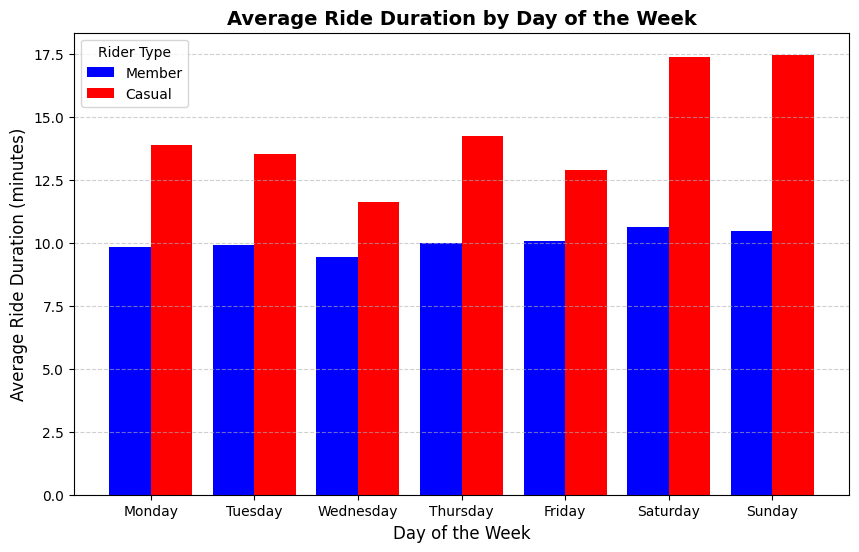

In [54]:

cyc["day_of_week"] = cyc["started_at"].dt.day_name()
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

avg_ride_by_day = cyc.groupby(["day_of_week", "member_casual"])["ride_duration"].mean().unstack()
avg_ride_by_day = avg_ride_by_day.reindex(day_order)

x = np.arange(len(day_order))
bar_width = 0.4

plt.figure(figsize=(10,6))
plt.bar(x - bar_width/2, avg_ride_by_day["member"], width=bar_width, color="blue", label="Member")
plt.bar(x + bar_width/2, avg_ride_by_day["casual"], width=bar_width, color="red", label="Casual")

plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Average Ride Duration (minutes)", fontsize=12)
plt.title("Average Ride Duration by Day of the Week", fontsize=14, fontweight="bold")

plt.xticks(ticks=x, labels=day_order, fontsize=10)
plt.legend(title="Rider Type")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()